In [1]:
import pandas as pd
import numpy as np
import math
import random
import seaborn as sns
from sklearn.utils import shuffle
from scipy.stats import multivariate_normal

wineData = pd.read_csv('Data/winequality-white.csv')
wineData.dropna
wineData

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [2]:
# randomly pick 1000 wine data
from sklearn.utils import shuffle
wine_1000 = shuffle(wineData)[:1000]
wine_1000

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4468,6.2,0.210,0.24,1.20,0.051,31.0,95.0,0.99036,3.24,0.57,11.300000,6
4303,6.9,0.260,0.29,4.20,0.043,33.0,114.0,0.99020,3.16,0.31,12.500000,6
4664,6.1,0.160,0.34,6.10,0.034,31.0,114.0,0.99365,3.32,0.58,10.133333,7
4351,6.4,0.310,0.28,2.50,0.039,34.0,137.0,0.98946,3.22,0.38,12.700000,6
4331,7.4,0.380,0.34,8.30,0.052,44.0,168.0,0.99627,3.11,0.52,9.200000,5
...,...,...,...,...,...,...,...,...,...,...,...,...
3451,6.6,0.210,0.29,5.35,0.029,43.0,106.0,0.99112,2.93,0.43,11.500000,7
4778,5.8,0.315,0.19,19.40,0.031,28.0,106.0,0.99704,2.97,0.40,10.550000,6
2015,6.9,0.190,0.39,8.00,0.028,22.0,84.0,0.99400,3.11,0.66,10.800000,6
4273,5.7,0.220,0.20,16.00,0.044,41.0,113.0,0.99862,3.22,0.46,8.900000,6


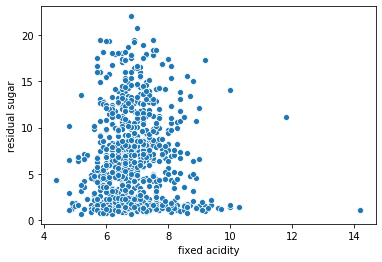

In [3]:
sns.scatterplot(data=wine_1000, x='fixed acidity', y='residual sugar')

# Gaussian Mixture Model

I will use Gaussian Mixture Model to different clusters based on the similarity. My clusters are based on two of the features (i.e. fixed acidity / residual sugar).

In [4]:
def gaussian(sample,mu,sigma):
    x = np.array(sample)
    D = len(x)
    exp_part = np.exp(-(1/2)*np.matmul(np.matmul((x-mu),np.linalg.inv(sigma)),(x-mu).T))
    N = (1/math.sqrt(((2*np.pi)**D)*np.linalg.det(sigma)))
    gaussian_value = N * exp_part
    return gaussian_value

# Implementing Expectation-Maximization Algorithm for GMM

First is the expectation step

In [5]:
def E_step(sample,param,K):
    mu = np.array(param['mu'])
    sigma = np.array(param['sigma'])
    phi = np.array(param['phi'])
    
    x = np.array(sample)
    D = len(x)
    probability = np.zeros((D,K))
    label = [] # label of each clusters
    for i in range(D):
        for k in range(K):
            bottum_total = 0
            for j in range(K):
                bottum_total += phi[j] * gaussian(x[i],mu[j],sigma[j])
            probability[i][k] = phi[k] * gaussian(x[i],mu[k],sigma[k]) / bottum_total
        max_prob = max(probability[i])
        label.append(list(probability[i]).index(max_prob))
    
    sample['Label'] = label
    return probability,sample

Upload the data with only two features

In [6]:
wine_2_feature = wine_1000[['fixed acidity','residual sugar']]
wine_2_feature

,fixed acidity,residual sugar
4468,6.2,1.20
4303,6.9,4.20
4664,6.1,6.10
4351,6.4,2.50
4331,7.4,8.30
...,...,...
3451,6.6,5.35
4778,5.8,19.40
2015,6.9,8.00
4273,5.7,16.00


Maximization step to get optimal parameter (mu,sigma,phi)

In [8]:
def M_step(sample,probability,param,K):
    x = np.array(sample)
    D = len(x)
    new_phi = []
    new_mu = []
    new_sigma = []
    
    old_mu = np.array(param['mu'])
    
    mu_sum = 0
    sigma_sum = 0
    
    for k in range(K):
        prob_sum = 0
        for i in range(D):
            prob_sum += probability[i][k]
            mu_sum += probability[i][k] * x[i]
            diff = (x[i] - old_mu[k]).reshape(-1,1)
            sigma_sum += probability[i][k] * np.matmul((diff),(diff).T)
        new_phi.append(prob_sum / D)
        new_mu.append(mu_sum / prob_sum)
        new_sigma.append(sigma_sum / prob_sum)
        
    param['mu'] = new_mu
    param['sigma'] = new_sigma
    param['phi'] = new_phi
    return param

Calculate the likelihood function

In [14]:
def likelihood(sample,param,K):
    mu = np.array(param['mu'])
    sigma = np.array(param['sigma'])
    phi = np.array(param['phi'])
    
    x = np.array(sample)
    D = len(x)
    
    likelihood = 0
    for i in range(D):
        cluster_sum = 0
        for k in range(K):
            cluster_sum += phi[k] * gaussian(x[i],mu[k],sigma[k])
            
        likelihood = likelihood + math.log1p(cluster_sum)
        
    return likelihood

# Now implementing GMM model

There still a problem exist in my GMM model (same problem with student-mat data). My model is not able to converge, and while more iteration I run, some value of mu, or sigma will be very large to infinite, which is not expected. I think it might be some problem with initization of those parameters, however, I am stuck in fix the problem. 

I then only run with 1 iteration, and the final result (clustering) looks good that the data is clustered to different groups based on the similarities

In [10]:
def GMM(sample,K,epsilon = 0.01,num_iter = 1):
    # initialize mu,sigma,phi
    [n,p] = sample.shape
    mu = []
    sigma = []
    phi = []
    for k in range(K):
        mu.append(np.array(sample)[random.randrange(n),:]) # randomly pick mu from sample instances
        sigma.append(np.eye(p)) 
        phi.append((1/K))
        
    initial_params = {'mu':mu,'sigma':sigma,'phi':phi}
    params = pd.DataFrame.from_dict(initial_params)
    old_likelihood = likelihood(sample,params,K)
    converge = False
    itera = 0
    while converge == False and itera < num_iter:
        probability, sample_with_label = E_step(sample.copy(),params,K)
        new_params = M_step(sample,probability,params.copy(),K)
        
        # test for converge
        new_likelihood = likelihood(sample,new_params,K)
        if (abs(new_likelihood-old_likelihood) < epsilon):
            converge = True
        params = new_params
        old_likelihood = new_likelihood
        itera += 1
        
    return params,sample_with_label

Cluster the data to 3 clusters

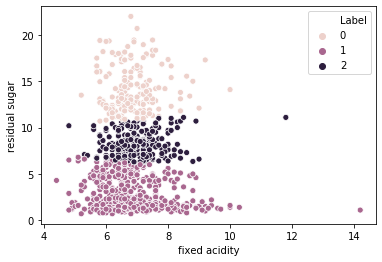

In [12]:
pram, sample_done = GMM(wine_2_feature,3)

sns.scatterplot(data=sample_done, x='fixed acidity', y='residual sugar',hue='Label')

2 clusters

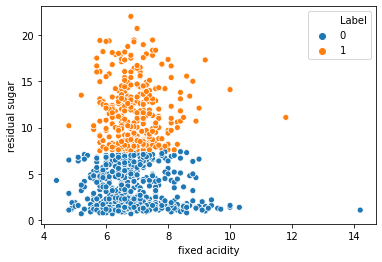

In [13]:
pram, sample_done = GMM(wine_2_feature,2)

sns.scatterplot(data=sample_done, x='fixed acidity', y='residual sugar',hue='Label')